## Setup

In [1]:
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import subprocess
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
%matplotlib inline

import sqlite3

In [2]:
# files stored locally at /data/user/jspencermorris/testdata
db_path = '/testdata/kpf_ts_oct2024.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path) # build database

# import the test timeseries database
myTS = AnalyzeTimeSeries(db_path=db_path)

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /testdata/kpf_ts_oct2024.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 335 cols over 27 days in 20241001-20241027; updated 2024-12-10 00:49:39
INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /testdata/kpf_ts_oct2024.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 335 cols over 27 days in 20241001-20241027; updated 2024-12-10 00:49:39


## Define Helper Functions

In [3]:
# define a simple function to run a query and return the results as a dataframe
def jsm_kpf_query(jsm_query):
    conn = sqlite3.connect(myTS.db_path)
    cursor = conn.cursor()
    query = jsm_query
    results_df = pd.read_sql_query(query, conn)
    conn.close()
    
    return results_df 

## EDA - L2

In [4]:
# define a query to return the highest level (data products (L2) for final RV's
# NOTE:  CCFBJD is not found ???
# NOTE:  The final RV's are empty !!!
query = """
SELECT ObsID, datecode, CCFRV, CCFERV 
FROM kpfdb
ORDER BY ObsID
"""

# return the results in a df
df_01a = jsm_kpf_query(query)

# inspect the df
display(df_01a.tail())

,ObsID,datecode,CCFRV,CCFERV
14923,KP.20241027.71891.69,20241027,None,None
14924,KP.20241027.71942.46,20241027,None,None
14925,KP.20241027.71992.22,20241027,None,None
14926,KP.20241027.72042.88,20241027,None,None
14927,KP.20241027.72093.42,20241027,None,None


## EDA - CCD1

In [5]:
# define a query to return the highest level (data products (L2) for final RV's as well as Green CCD RV's
query = """
SELECT ObsID, datecode, CCD1BJD, CCFRV, CCFERV, CCD1RV1, CCD1ERV1, CCD1RV2, CCD1ERV2, CCD1RV3, CCD1ERV3, CCD1RV, CCD1ERV
FROM kpfdb
ORDER BY ObsID
"""

# return the results in a df
df_01b = jsm_kpf_query(query)

# create new feature for the day number
df_01b['day_num'] = df_01b['CCD1BJD'] - df_01b['CCD1BJD'].iloc[0] # create a new column for day number of the month
position = df_01b.columns.get_loc('CCD1BJD') + 1  # find the position of 'CCD1BJD' and add one
df_01b.insert(position, 'day_num', df_01b.pop('day_num'))  # insert 'day_num' at the correct position

# inspect the df
display(df_01b.head())

# display the df structure
print("DataFrame Information:")
display(df_01b.info())

# inspect summary stats
print("\nSummary Statistics:")
display(df_01b.describe())

,ObsID,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV
0,KP.20241001.00018.07,20241001,2.460585e+06,0.000000,None,None,99.596397,0.165004,99.582283,0.161572,99.570768,0.160154,99.588124,0.106252
1,KP.20241001.00076.69,20241001,2.460585e+06,0.000678,None,None,98.356045,0.067148,98.991361,0.146072,99.783053,0.168876,99.688980,0.106544
2,KP.20241001.00134.98,20241001,2.460585e+06,0.001353,None,None,99.115111,0.188323,98.066629,0.161624,99.705058,0.156691,99.729656,0.108858
3,KP.20241001.00193.33,20241001,2.460585e+06,0.002029,None,None,98.958977,0.154265,99.093026,0.163043,99.280551,0.169930,99.088525,0.112403
4,KP.20241001.00251.84,20241001,2.460585e+06,0.002705,None,None,98.665047,0.173642,99.577944,0.158185,99.228884,0.164925,99.148885,0.114509


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14928 entries, 0 to 14927
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ObsID     14928 non-null  object 
 1   datecode  14928 non-null  object 
 2   CCD1BJD   13409 non-null  float64
 3   day_num   13409 non-null  float64
 4   CCFRV     0 non-null      object 
 5   CCFERV    0 non-null      object 
 6   CCD1RV1   13409 non-null  float64
 7   CCD1ERV1  13409 non-null  float64
 8   CCD1RV2   13409 non-null  float64
 9   CCD1ERV2  13409 non-null  float64
 10  CCD1RV3   13409 non-null  float64
 11  CCD1ERV3  13409 non-null  float64
 12  CCD1RV    13409 non-null  float64
 13  CCD1ERV   13409 non-null  float64
dtypes: float64(10), object(4)
memory usage: 1.6+ MB


None


Summary Statistics:


,CCD1BJD,day_num,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV
count,1.340900e+04,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000,13409.000000
mean,2.460598e+06,13.379546,25.035908,0.044802,24.801584,0.043500,24.973426,0.041310,24.172373,0.030944
std,7.691396e+00,7.691396,49.365795,0.072131,50.970786,0.069188,50.802428,0.068220,59.956992,0.049072
min,2.460585e+06,0.000000,-135.678048,0.000000,-353.860259,0.000000,-312.017380,0.000000,-2593.387707,0.000000
25%,2.460591e+06,6.828748,-0.615064,0.000181,-0.641686,0.000158,-0.669776,0.000173,-0.642531,0.000098
50%,2.460598e+06,13.135598,-0.005274,0.000425,-0.004873,0.000380,-0.007124,0.000415,-0.006316,0.000234
75%,2.460604e+06,19.973012,98.358179,0.146863,98.518915,0.144137,98.233829,0.067878,99.076041,0.104812
max,2.460611e+06,26.798099,193.886278,0.224840,358.840320,0.208300,628.757553,0.227110,734.307702,0.232310


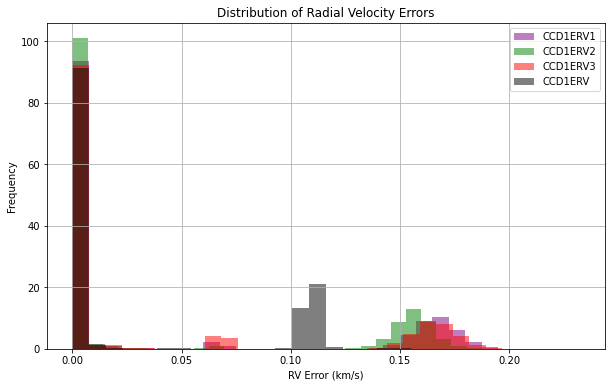

In [6]:
# plot the distributions of radial velocity errors

plt.figure(figsize=(10, 6))

plt.hist(df_01b['CCD1ERV1'].dropna(), bins=30, alpha=0.5, label='CCD1ERV1', color='purple', density=True)
plt.hist(df_01b['CCD1ERV2'].dropna(), bins=30, alpha=0.5, label='CCD1ERV2', color='green', density=True)
plt.hist(df_01b['CCD1ERV3'].dropna(), bins=30, alpha=0.5, label='CCD1ERV3', color='red', density=True)
plt.hist(df_01b['CCD1ERV'].dropna(), bins=30, alpha=0.5, label='CCD1ERV', color='black', density=True)

plt.xlabel('RV Error (km/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Radial Velocity Errors')
plt.legend()
plt.grid(True)
plt.show()


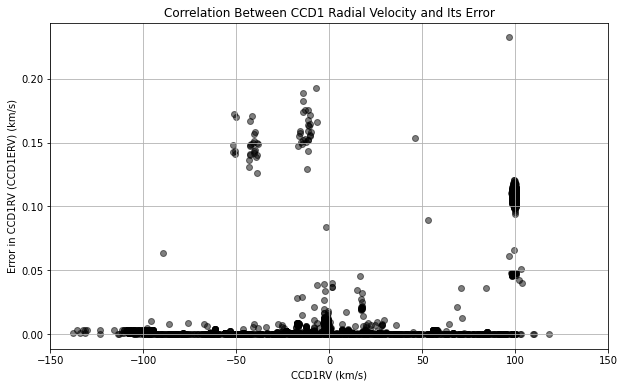

In [7]:
# Scatter plot to explore the correlation between CCD1RV and its error CCD1ERV

plt.figure(figsize=(10, 6))
plt.scatter(df_01b['CCD1RV'], df_01b['CCD1ERV'], color='black', alpha=0.5)

plt.xlim(-150, 150)

plt.xlabel('CCD1RV (km/s)')
plt.ylabel('Error in CCD1RV (CCD1ERV) (km/s)')
plt.title('Correlation Between CCD1 Radial Velocity and Its Error')
plt.grid(True)
plt.show()


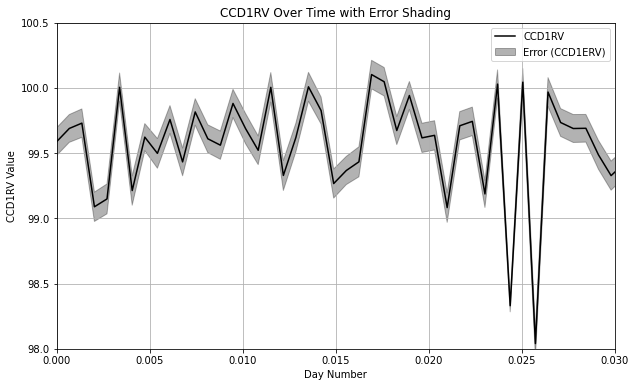

In [8]:
# plot the mean RV value, along with its error, from the Green CCD over time

# compute the upper and lower bounds for the error region
df_01b['CCD1RV_upper'] = df_01b['CCD1RV'] + df_01b['CCD1ERV']
df_01b['CCD1RV_lower'] = df_01b['CCD1RV'] - df_01b['CCD1ERV']

plt.figure(figsize=(10, 6))
plt.plot(df_01b['day_num'], df_01b['CCD1RV'], label='CCD1RV', color='black')
plt.fill_between(df_01b['day_num'], df_01b['CCD1RV_lower'], df_01b['CCD1RV_upper'], color='black', alpha=0.3, label='Error (CCD1ERV)')
plt.xlim(0, 0.03)
plt.ylim(98, 100.5)
plt.xlabel('Day Number')
plt.ylabel('CCD1RV Value')
plt.title('CCD1RV Over Time with Error Shading')
plt.legend()
plt.grid(True)
plt.show()


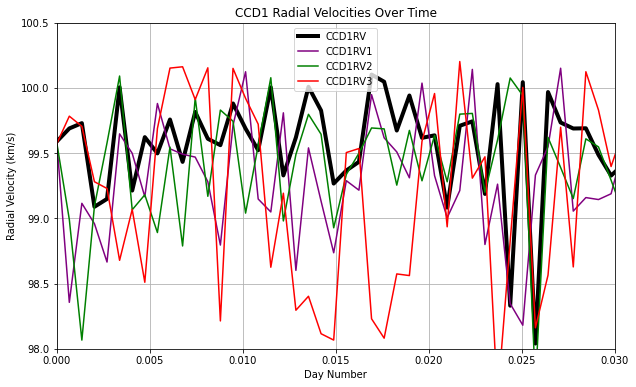

In [9]:
# plot the RV component and mean values over time

plt.figure(figsize=(10, 6))
plt.plot(df_01b['day_num'], df_01b['CCD1RV'], label='CCD1RV', color='black', linewidth=4)  # Black and thicker line
plt.plot(df_01b['day_num'], df_01b['CCD1RV1'], label='CCD1RV1', color='purple')
plt.plot(df_01b['day_num'], df_01b['CCD1RV2'], label='CCD1RV2', color='green')
plt.plot(df_01b['day_num'], df_01b['CCD1RV3'], label='CCD1RV3', color='red')
plt.xlim(0, 0.03)
plt.ylim(98, 100.5)
plt.xlabel('Day Number')
plt.ylabel('Radial Velocity (km/s)')
plt.title('CCD1 Radial Velocities Over Time')
plt.legend()
plt.grid(True)
plt.show()


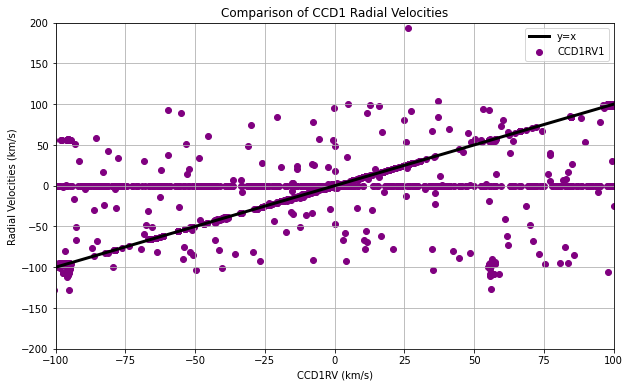

In [10]:
# plot the mean RV against the component RV's

plt.figure(figsize=(10, 6))
plt.scatter(df_01b['CCD1RV'], df_01b['CCD1RV1'], label='CCD1RV1', color='purple')
#plt.scatter(df_01b['CCD1RV'], df_01b['CCD1RV2'], label='CCD1RV2', color='green')
#plt.scatter(df_01b['CCD1RV'], df_01b['CCD1RV3'], label='CCD1RV3', color='red')

# Adding the diagonal line
min_val = min(df_01b['CCD1RV'].min(), df_01b['CCD1RV1'].min(), df_01b['CCD1RV2'].min(), df_01b['CCD1RV3'].min())
max_val = max(df_01b['CCD1RV'].max(), df_01b['CCD1RV1'].max(), df_01b['CCD1RV2'].max(), df_01b['CCD1RV3'].max())
plt.plot([min_val, max_val], [min_val, max_val], color="black", linewidth=3, label='y=x')

plt.xlim(-100, 100)
plt.ylim(-200, 200)
plt.xlabel('CCD1RV (km/s)')
plt.ylabel('Radial Velocities (km/s)')
plt.title('Comparison of CCD1 Radial Velocities')
plt.legend()
plt.grid(True)
plt.show()
